In [129]:
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv("Assignment 2/ddf--datapoints--aged_15plus_unemployment_rate_percent--by--geo--time.csv")
df2 = pd.read_csv("Assignment 2/ddf--datapoints--cell_phones_per_100_people--by--geo--time.csv")
df3 = pd.read_csv("Assignment 2/ddf--datapoints--co2_emissions_tonnes_per_person--by--geo--time.csv")
df4 = pd.read_csv("Assignment 2/ddf--datapoints--gapminder_gini--by--geo--time.csv")
df5 = pd.read_csv("Assignment 2/ddf--datapoints--gdp_per_capita_yearly_growth--by--geo--time.csv")
df6 = pd.read_csv("Assignment 2/ddf--datapoints--income_per_person_with_projections--by--geo--time.csv")
df7 = pd.read_csv("Assignment 2/ddf--datapoints--inflation_annual_percent--by--geo--time.csv")
df8 = pd.read_csv("Assignment 2/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
df9 = pd.read_csv("Assignment 2/ddf--datapoints--population_total--by--geo--time.csv")
df10 = pd.read_csv("Assignment 2/ddf--datapoints--sex_ratio_all_age_groups--by--geo--time.csv")





In [130]:
# 1)Import and merge all files into a single data file. Show the data type of all columns along with the shape of the merged dataframe. Now merge the continents csv file with the above merged file. Call it gm_df.

df = df1.copy()

for x in [df2, df3, df4, df5, df6, df7, df8, df9, df10]:
    df = pd.merge(df, x, sort=True, how='outer', on=['time', 'geo'])

# for column in df.columns:
#     print(column)
print(df.dtypes)
print(df.shape)


geo                                       object
time                                       int64
aged_15plus_unemployment_rate_percent    float64
cell_phones_per_100_people               float64
co2_emissions_tonnes_per_person          float64
gapminder_gini                           float64
gdp_per_capita_yearly_growth             float64
income_per_person_with_projections       float64
inflation_annual_percent                 float64
life_expectancy_years                    float64
population_total                         float64
sex_ratio_all_age_groups                 float64
dtype: object
(69616, 12)


In [131]:
continents = pd.read_csv('Assignment 2/letter codes and continents .csv')
continents['ISO (3)'] = continents['ISO (3)'].str.lower()

gm_df = pd.merge(df, continents, how='outer', left_on='geo', right_on='ISO (3)').sort_values(by='time')
print(gm_df.head)

<bound method NDFrame.head of        geo    time  aged_15plus_unemployment_rate_percent  \
0      aut  1764.0                                    NaN   
5729   swe  1764.0                                    NaN   
5392   prt  1764.0                                    NaN   
5055   pol  1764.0                                    NaN   
674    bgd  1764.0                                    NaN   
...    ...     ...                                    ...   
69626  NaN     NaN                                    NaN   
69627  NaN     NaN                                    NaN   
69628  NaN     NaN                                    NaN   
69629  NaN     NaN                                    NaN   
69630  NaN     NaN                                    NaN   

       cell_phones_per_100_people  co2_emissions_tonnes_per_person  \
0                             NaN                              NaN   
5729                          NaN                              NaN   
5392                       

In [132]:
# 2)Create a subset of the above table by filtering data for years 2010 through 2020.

subset = gm_df[(2010 <= gm_df['time']) & (gm_df['time'] <= 2020)]

print(subset.head)

<bound method NDFrame.head of        geo    time  aged_15plus_unemployment_rate_percent  \
9557   arg  2010.0                                   7.71   
36647  lca  2010.0                                    NaN   
57115  svk  2010.0                                  14.38   
50192  prk  2010.0                                    NaN   
54707  sle  2010.0                                    NaN   
...    ...     ...                                    ...   
2278   esp  2020.0                                  15.53   
53513  sen  2020.0                                    NaN   
37861  ltu  2020.0                                   8.49   
256    aut  2020.0                                   5.36   
21607  dnk  2020.0                                   5.64   

       cell_phones_per_100_people  co2_emissions_tonnes_per_person  \
9557                    139.58002                          4.56831   
36647                   113.85932                          2.31699   
57115                   109

(2610, 19) (989, 19)


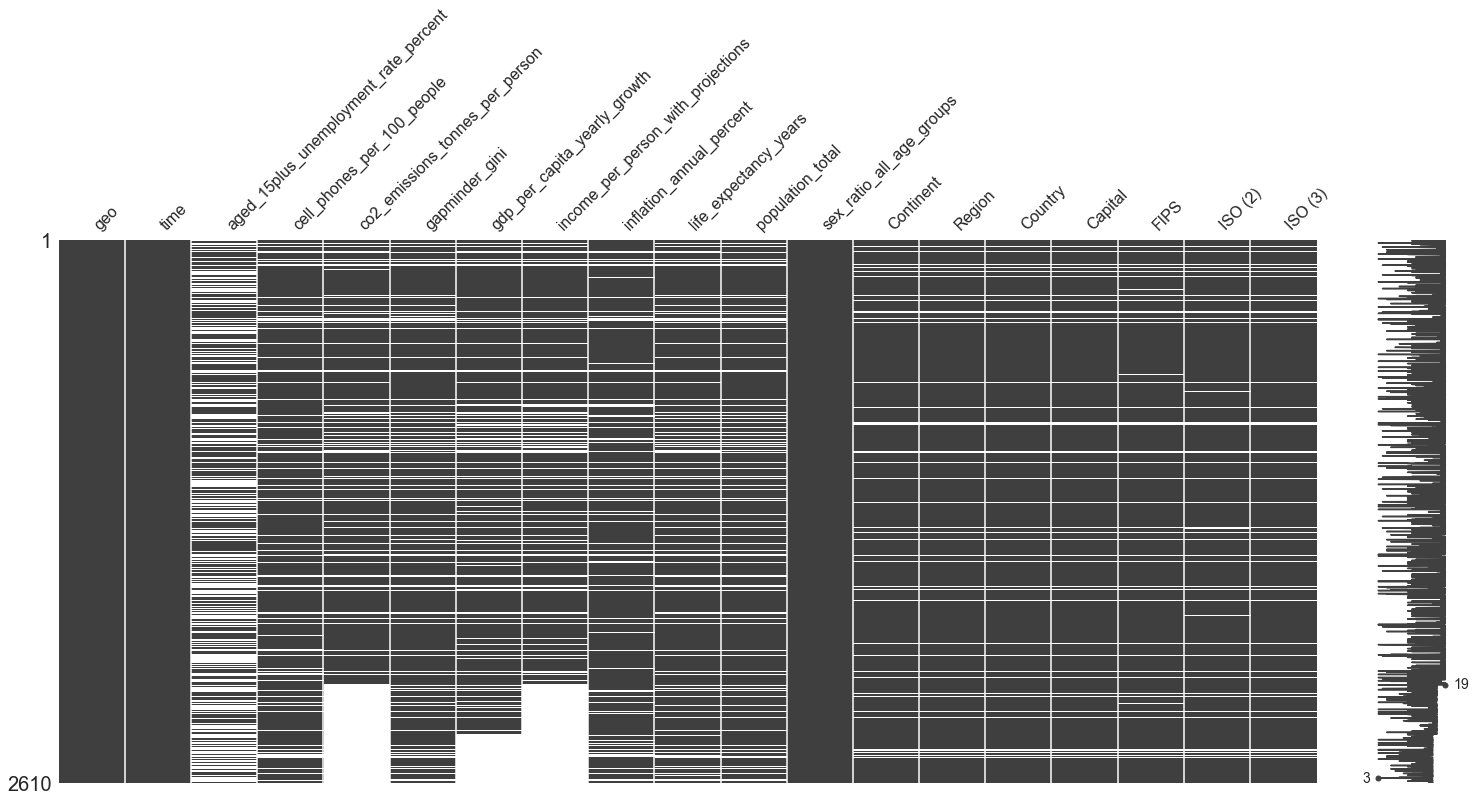

In [133]:
# 3)Analyze missing values and create new columns by imputing using at least two different methods.

import missingno as msno

subsetdna = subset.dropna()
print(subset.shape, subsetdna.shape)

msno.matrix(subset);

/Users/ZongyuWu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ZongyuWu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/ZongyuWu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

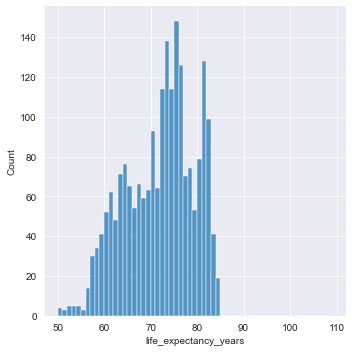

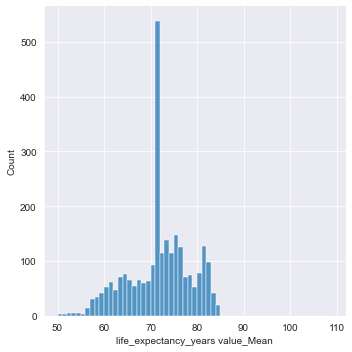

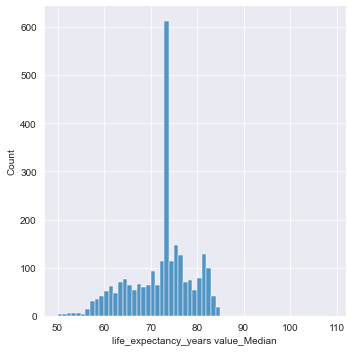

In [134]:
from sklearn.impute import SimpleImputer
import seaborn as sns

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

subset.loc[:, "life_expectancy_years value_Mean"] = mean_imputer.fit_transform(subset.loc[:, "life_expectancy_years"].values.reshape(-1,1))
subset.loc[:, "life_expectancy_years value_Median"] = median_imputer.fit_transform(subset.loc[:, "life_expectancy_years"].values.reshape(-1,1))

for a in ["life_expectancy_years", "life_expectancy_years value_Mean", "life_expectancy_years value_Median"]:
    sns.displot(subset[a], bins=range(50, 110, 1), kde=False)

In [135]:
# 4) Create new features (columns) in the following way
# a.Categorical columns the size of nations: Small (< 1 million), Medium (1 million to 10 million), Large (10 -100 million), Very Large ( > 100 million)

subset.reset_index(drop=True, inplace=True)

subset['size_of_nation'] = pd.cut(subset['population_total'],
                                  [0, 1000000, 10000000, 100000000, max(subset['population_total']) + 1],
                                  labels=['Small', 'Medium', 'Large', 'Very Large'])
print(subset['size_of_nation'])
print(subset['size_of_nation'].value_counts())

0        Large
1        Small
2       Medium
3        Large
4       Medium
         ...  
2605     Large
2606     Large
2607    Medium
2608    Medium
2609    Medium
Name: size_of_nation, Length: 2610, dtype: category
Categories (4, object): [Small < Medium < Large < Very Large]
Large         824
Medium        776
Small         431
Very Large    136
Name: size_of_nation, dtype: int64


/Users/ZongyuWu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [136]:
# b.Categorical columns the income per person of nations: Low(< $1,000), Medium ($1,000 - $10,000), High(>$10,000)

subset['income_per_person_of_nations'] = pd.cut(subset['income_per_person_with_projections'],
                                  [0, 1000, 10000, max(subset['income_per_person_with_projections']) + 1],
                                  labels=['Low', 'Medium', 'High'])
print(subset['income_per_person_of_nations'])
print(subset['income_per_person_of_nations'].value_counts())

0         High
1         High
2         High
3       Medium
4          Low
         ...  
2605       NaN
2606       NaN
2607       NaN
2608       NaN
2609       NaN
Name: income_per_person_of_nations, Length: 2610, dtype: category
Categories (3, object): [Low < Medium < High]
Medium    845
High      753
Low       111
Name: income_per_person_of_nations, dtype: int64


/Users/ZongyuWu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


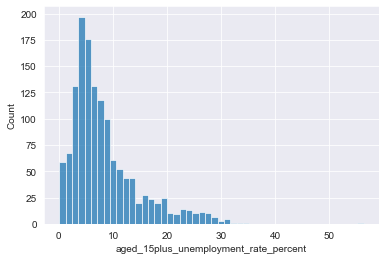

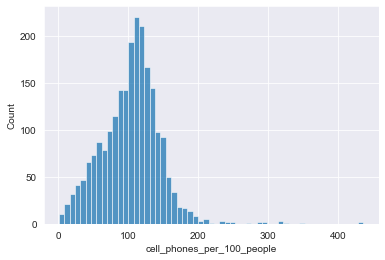

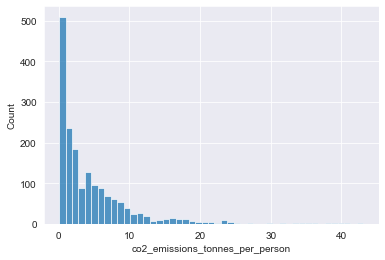

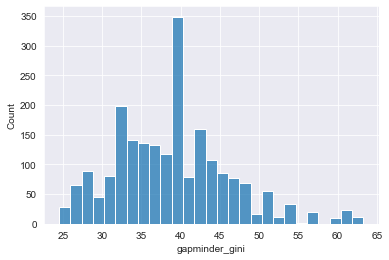

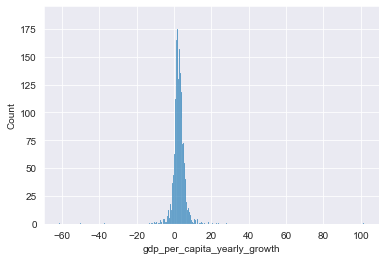

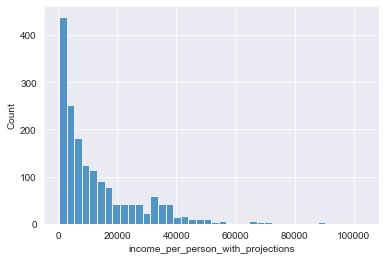

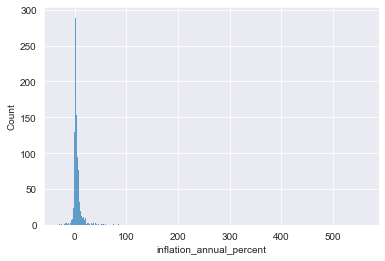

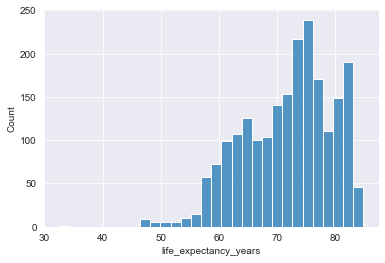

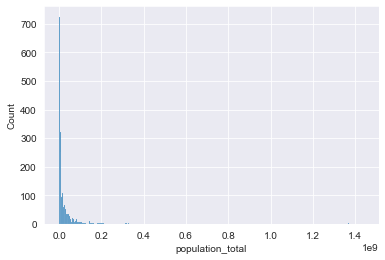

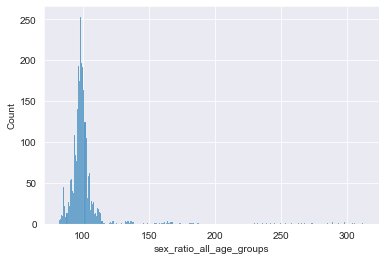

In [137]:
# 5)Perform descriptive analysis for all numerical columns. Then create cross-tabulations for the newly created categorical columns for size and income per person by continents and regions. Visualize the categorical columns.

for column in subset.loc[:, 'aged_15plus_unemployment_rate_percent':'sex_ratio_all_age_groups'].columns:
    sns.histplot(data=subset[column])
    plt.show()

In [138]:
for x in ['Continent', 'Region']:
    for y in ['size_of_nation', 'income_per_person_of_nations']:
        print(pd.crosstab(subset[x], subset[y]), '\n')

size_of_nation  Small  Medium  Large  Very Large
Continent                                       
Africa             57     193    292          19
Americas          121     103    128          33
Asia               33     194    217          84
Europe             77     218    134           0
Oceania           121      22     11           0 

income_per_person_of_nations  Low  Medium  High
Continent                                      
Africa                        102     295    56
Americas                        0     148   181
Asia                            0     237   177
Europe                          0      42   281
Oceania                         0      83    26 

size_of_nation     Small  Medium  Large  Very Large
Region                                             
Central Africa         0      27     28           0
Central America       11      55     11          11
Central Asia           0      33     22           0
Central Europe        11      44     11           0
East 

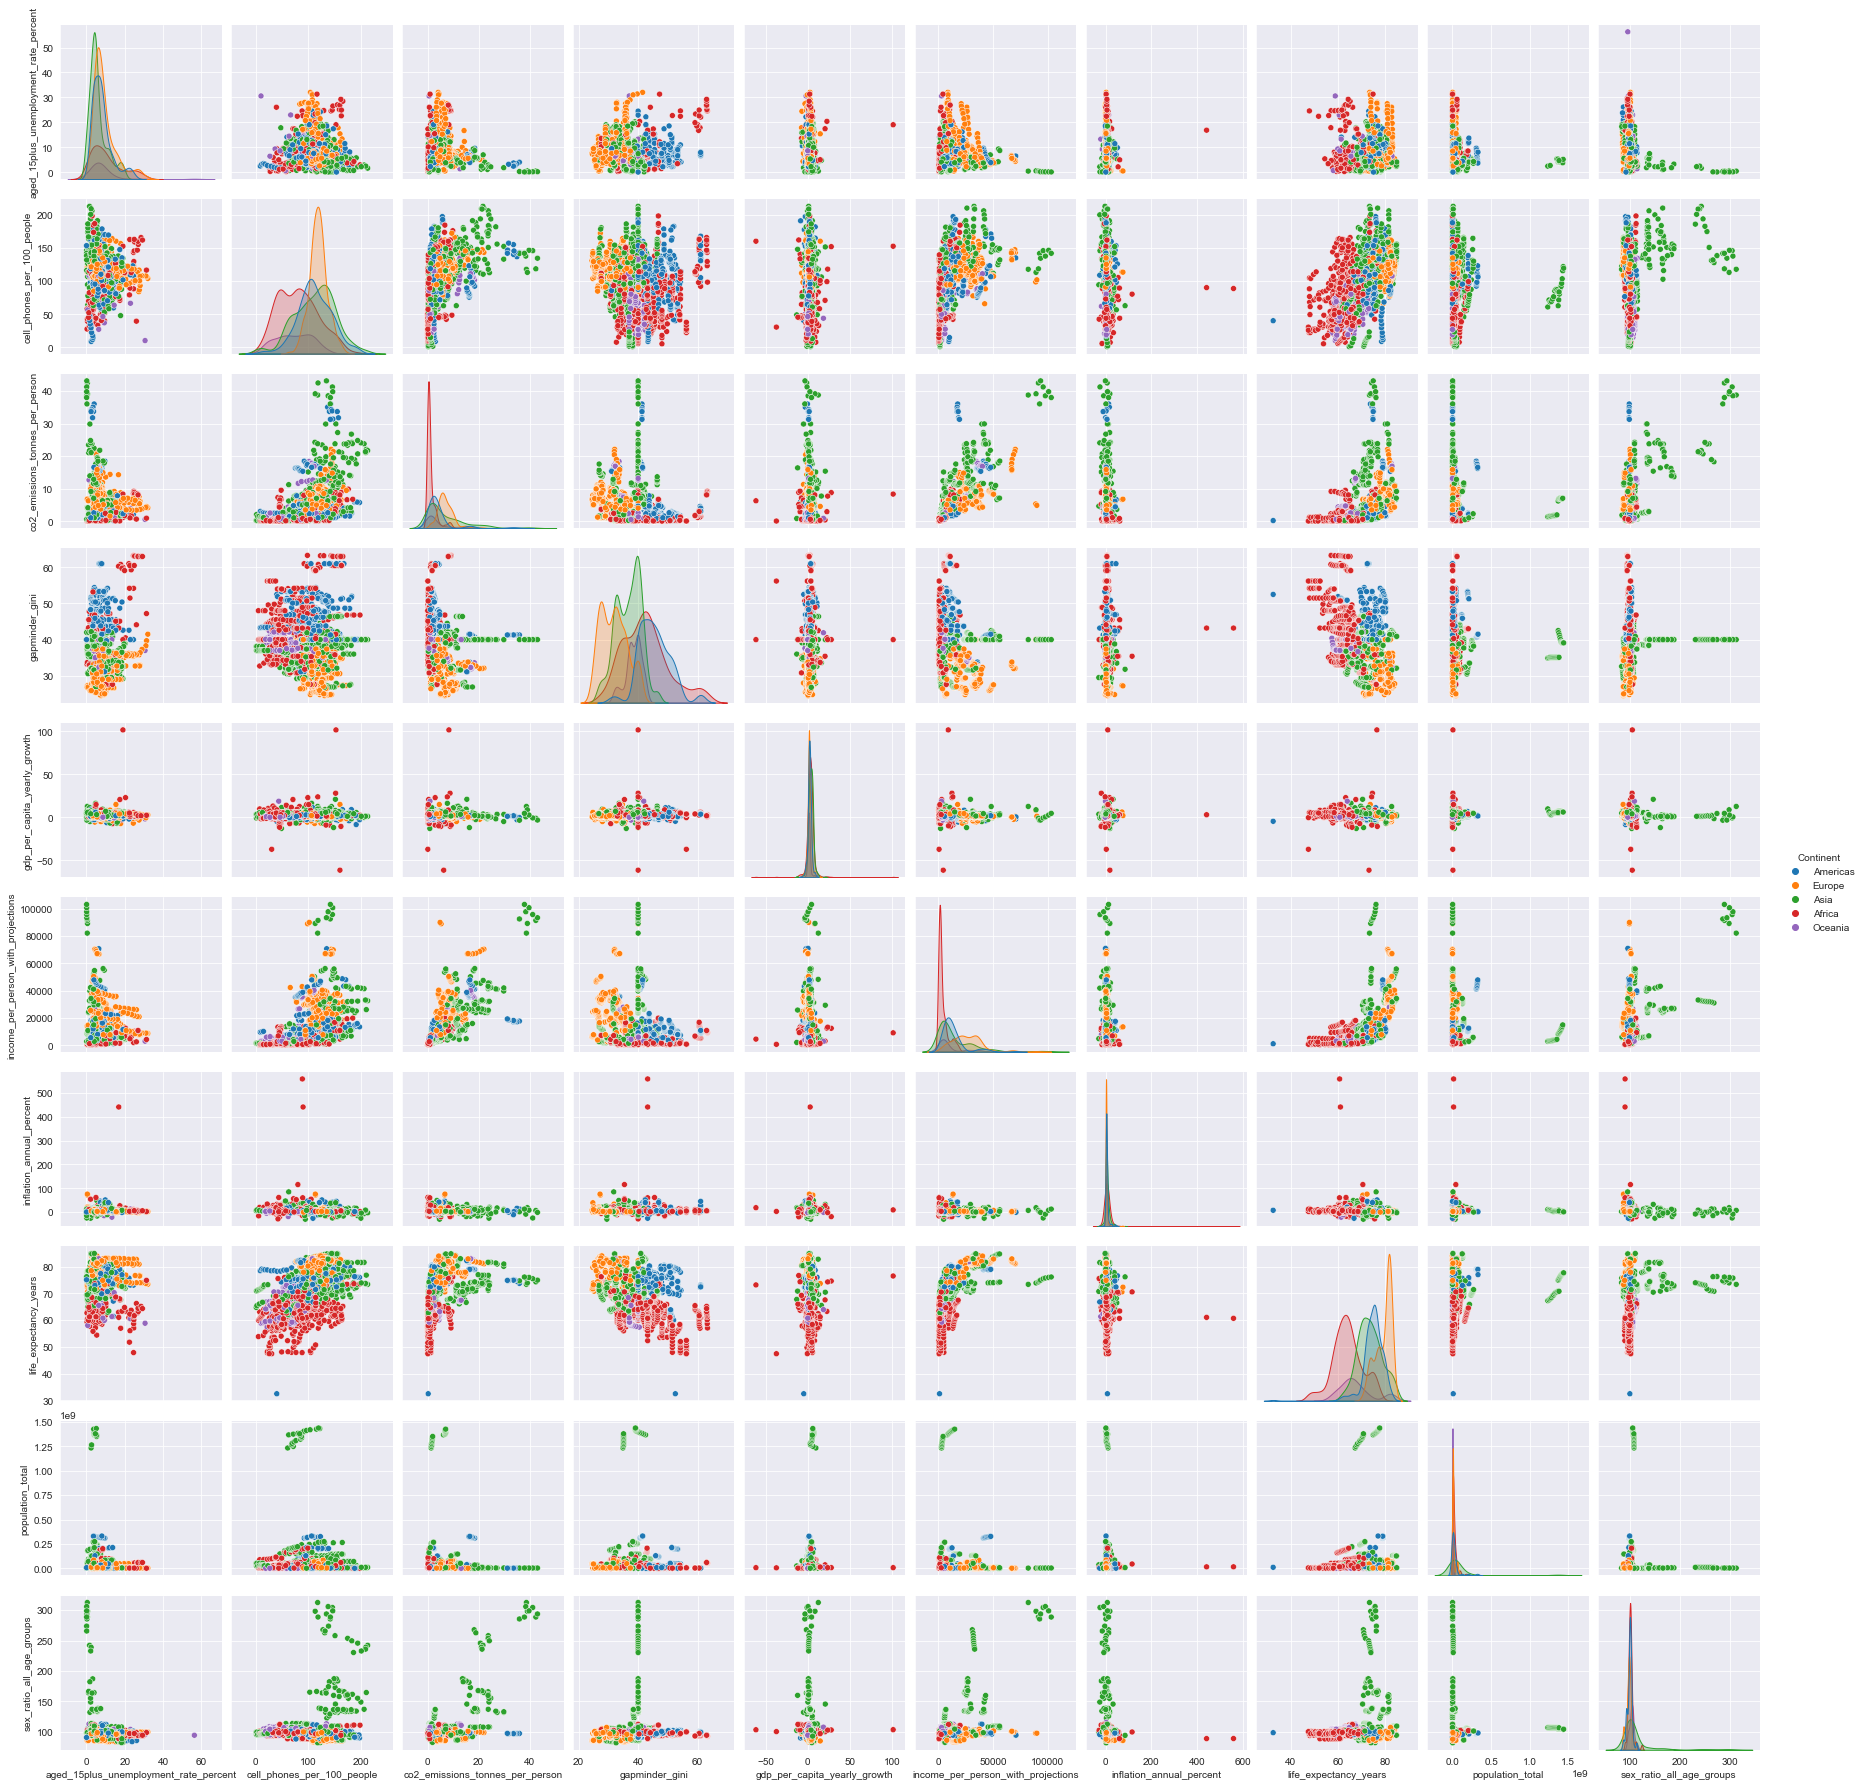

In [139]:
# 6) Create paired plot of all numerical columns and color code by continents.

tmp = subset.loc[:, 'aged_15plus_unemployment_rate_percent':'sex_ratio_all_age_groups']
tmp['Continent'] = subset['Continent']
sns.pairplot(tmp, hue='Continent', height=2.5);

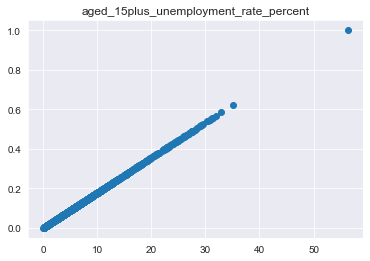

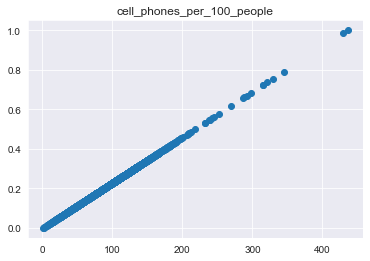

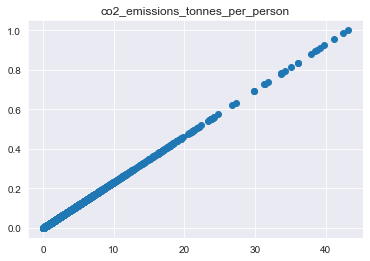

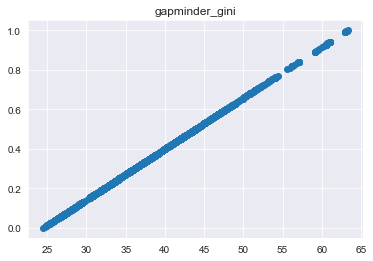

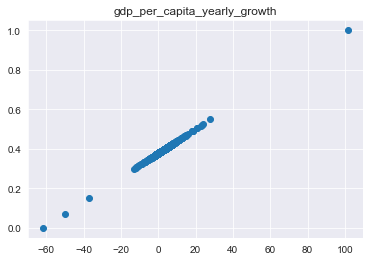

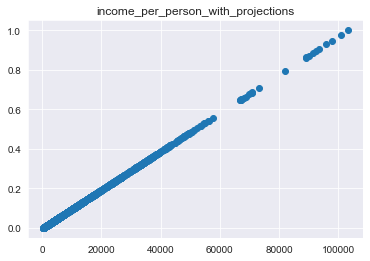

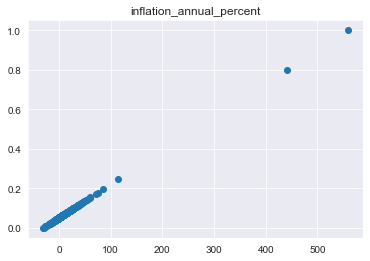

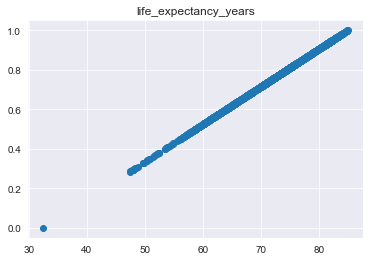

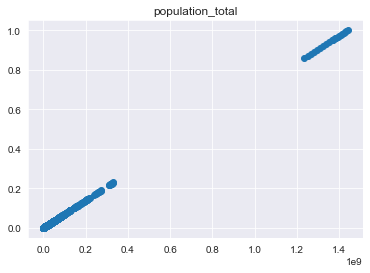

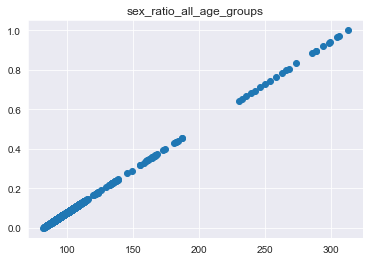

In [140]:
# 7) Standardize and Normalize (minmax) all numerical columns. Create scatterplots of the original scale with the transformed scale for any three of the numerical columns.

subset_std = subset.copy()
for column in subset.loc[:, 'aged_15plus_unemployment_rate_percent':'sex_ratio_all_age_groups'].columns:
    MAX = max(subset[column])
    MIN = min(subset[column])
    subset_std[column] = subset_std[column].apply(lambda x: (x - MIN) / (MAX - MIN))
    plt.scatter(subset[column], subset_std[column])
    plt.title(column)
    plt.show()

In [141]:
# 8) Run t-tests for the following comparisons:
# a.Mean life expectancy for African nations with European nations

from scipy.stats import ttest_ind

subset_std_dna = subset_std.dropna()

Africa = []
Europe = []
for i in sorted(list(set(subset_std_dna.time.values))):
    Africa.append(pd.DataFrame.mean(subset_std_dna[(subset_std_dna['time'] == i) & (subset_std_dna['Continent'] == 'Africa')].life_expectancy_years))
    Europe.append(pd.DataFrame.mean(subset_std_dna[(subset_std_dna['time'] == i) & (subset_std_dna['Continent'] == 'Europe')].life_expectancy_years))
lifeExpectancy = pd.DataFrame({'Africa':Africa, 'Europe':Europe})
print(ttest_ind(lifeExpectancy['Africa'], lifeExpectancy['Europe']))


Ttest_indResult(statistic=-24.044579846110242, pvalue=5.497938639869474e-14)


In [142]:
# b.Mean income for Asian nations with African nations.

Asia = []
Africa = []
for i in sorted(list(set(subset_std_dna.time.values))):
    Asia.append(pd.DataFrame.mean(subset_std_dna[(subset_std_dna['time'] == i) & (subset_std_dna['Continent'] == 'Asia')].income_per_person_with_projections))
    Africa.append(pd.DataFrame.mean(subset_std_dna[(subset_std_dna['time'] == i) & (subset_std_dna['Continent'] == 'Africa')].income_per_person_with_projections))
income = pd.DataFrame({'Asia':Africa, 'Africa':Africa})
print(ttest_ind(income['Asia'], income['Africa']))

Ttest_indResult(statistic=0.0, pvalue=1.0)


In [143]:
# c.Identify and eliminate outliers and perform the above tests again.

# subset_std_dna_elm = subset_std_dna[(np.abs(stats.zscore(subset_std_dna.loc[:, ['income_per_person_with_projections', 'life_expectancy_years']])) < 3)]
subset_std_dna_elm = subset_std_dna[(subset_std_dna.life_expectancy_years < subset_std_dna.life_expectancy_years.quantile(0.99)) & (subset_std_dna.life_expectancy_years > subset_std_dna.life_expectancy_years.quantile(0.01)) & (subset_std_dna.income_per_person_with_projections < subset_std_dna.income_per_person_with_projections.quantile(0.99)) & (subset_std_dna.income_per_person_with_projections > subset_std_dna.income_per_person_with_projections.quantile(0.01))]

Africa = []
Europe = []
for i in sorted(list(set(subset_std_dna_elm.time.values))):
    Africa.append(pd.DataFrame.mean(subset_std_dna_elm[(subset_std_dna_elm['time'] == i) & (subset_std_dna_elm['Continent'] == 'Africa')].life_expectancy_years))
    Europe.append(pd.DataFrame.mean(subset_std_dna_elm[(subset_std_dna_elm['time'] == i) & (subset_std_dna_elm['Continent'] == 'Europe')].life_expectancy_years))
lifeExpectancy = pd.DataFrame({'Africa':Africa, 'Europe':Europe})
print(ttest_ind(lifeExpectancy['Africa'], lifeExpectancy['Europe']))

Asia = []
Africa = []

for i in sorted(list(set(subset_std_dna_elm.time.values))):
    Asia.append(pd.DataFrame.mean(subset_std_dna_elm[(subset_std_dna_elm['time'] == i) & (subset_std_dna_elm['Continent'] == 'Asia')].income_per_person_with_projections))
    Africa.append(pd.DataFrame.mean(subset_std_dna_elm[(subset_std_dna['time'] == i) & (subset_std_dna_elm['Continent'] == 'Africa')].income_per_person_with_projections))
income = pd.DataFrame({'Asia':Africa, 'Africa':Africa})
print(ttest_ind(income['Asia'], income['Africa']))


Ttest_indResult(statistic=-31.65487753916599, pvalue=7.362493767372418e-16)
Ttest_indResult(statistic=0.0, pvalue=1.0)


/Users/ZongyuWu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [144]:
# 9) Run chi-sq test to check if the size of a nation is associated with the income per person of the nation.

from scipy.stats import chi2_contingency

print(chi2_contingency(observed=subset_std_dna[['population_total', 'income_per_person_with_projections']]))

(89.94082222789442, 1.0, 988, array([[0.02720753, 0.13848892],
       [0.03162203, 0.16095917],
       [0.0093474 , 0.04757916],
       ...,
       [0.01688721, 0.08595751],
       [0.06870364, 0.34970809],
       [0.18614572, 0.94749952]]))
